In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/human/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/human/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/human/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/human/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
pwd

'/home/human/Dropbox/clusterai'

# Importamos dataset de bicicletas publicas de BA Data, año 2018
El dataset en https://data.buenosaires.gob.ar/dataset/bicicletas-publicas.

In [17]:
bicis = pd.read_csv('/home/human/Dropbox/clusterai/recorridos_bicis_2018.csv', delimiter=',', parse_dates = ["FECHA_HORA_RETIRO"] , infer_datetime_format = True, dayfirst = True)

In [18]:
np.shape(bicis)

(1197368, 9)

In [19]:
bicis.head()

,ID_USUARIO,FECHA_HORA_RETIRO,TIEMPO_USO,ORIGEN_ESTACION,NOMBRE_ORIGEN,DESTINO_ESTACION,NOMBRE_DESTINO,SEXO,EDAD
0,493545,2018-01-18 16:42:32,0h 14min 23seg,100,Castillo,100,Castillo,F,16
1,492620,2018-01-11 19:48:07,0h 38min 12seg,108,Usina del Arte,108,Usina del Arte,F,16
2,470893,2018-01-02 19:34:43,0h 41min 8seg,110,Guardia Vieja,153,Juan Manuel Blanes,F,16
3,499307,2018-01-19 14:30:22,0h 58min 49seg,111,Macacha Güemes,111,Macacha Güemes,F,16
4,500994,2018-01-22 22:58:59,0h 38min 23seg,111,Macacha Güemes,111,Macacha Güemes,F,16


Observamos que podemos acceder a los elementos de la fecha de la columna "fecha_hora_retiro" mediante el comando ".dt" y luego el dato de fecha que querramos acceder. month = mes, day = dia, year = año.

In [20]:
bicis.FECHA_HORA_RETIRO.dt.month.head()

0    1
1    1
2    1
3    1
4    1
Name: FECHA_HORA_RETIRO, dtype: int64

# Feature Engineering: creaciòn de features nuevas

**Feature "mes"**

In [21]:
bicis["mes"] = bicis.FECHA_HORA_RETIRO.dt.month

In [22]:
bicis.mes.values

array([1, 1, 1, ..., 6, 6, 6])

**Feature "Cant_viajes**:Esto nos puede servir en el futuro para computar cuantos viajes hubo en un periodo de tiempo determinado.

In [23]:
bicis["cant_viajes"] = np.ones((np.shape(bicis)[0],1))

In [24]:
bicis.head()

,ID_USUARIO,FECHA_HORA_RETIRO,TIEMPO_USO,ORIGEN_ESTACION,NOMBRE_ORIGEN,DESTINO_ESTACION,NOMBRE_DESTINO,SEXO,EDAD,mes,cant_viajes
0,493545,2018-01-18 16:42:32,0h 14min 23seg,100,Castillo,100,Castillo,F,16,1,1.0
1,492620,2018-01-11 19:48:07,0h 38min 12seg,108,Usina del Arte,108,Usina del Arte,F,16,1,1.0
2,470893,2018-01-02 19:34:43,0h 41min 8seg,110,Guardia Vieja,153,Juan Manuel Blanes,F,16,1,1.0
3,499307,2018-01-19 14:30:22,0h 58min 49seg,111,Macacha Güemes,111,Macacha Güemes,F,16,1,1.0
4,500994,2018-01-22 22:58:59,0h 38min 23seg,111,Macacha Güemes,111,Macacha Güemes,F,16,1,1.0


In [25]:
# reviso que no existan NaNs en las columnas del dataframe "bicis"
bicis.isnull().any()

ID_USUARIO           False
FECHA_HORA_RETIRO    False
TIEMPO_USO           False
ORIGEN_ESTACION      False
NOMBRE_ORIGEN        False
DESTINO_ESTACION     False
NOMBRE_DESTINO       False
SEXO                 False
EDAD                 False
mes                  False
cant_viajes          False
dtype: bool

In [26]:
sexo = pd.get_dummies(bicis.SEXO)

In [27]:
sexo.head()

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [28]:
(sexo.index != bicis.index).sum()

0

In [29]:
bicis = pd.concat([bicis,sexo], axis = 1)

In [30]:
bicis.head()

,ID_USUARIO,FECHA_HORA_RETIRO,TIEMPO_USO,ORIGEN_ESTACION,NOMBRE_ORIGEN,DESTINO_ESTACION,NOMBRE_DESTINO,SEXO,EDAD,mes,cant_viajes,F,M
0,493545,2018-01-18 16:42:32,0h 14min 23seg,100,Castillo,100,Castillo,F,16,1,1.0,1,0
1,492620,2018-01-11 19:48:07,0h 38min 12seg,108,Usina del Arte,108,Usina del Arte,F,16,1,1.0,1,0
2,470893,2018-01-02 19:34:43,0h 41min 8seg,110,Guardia Vieja,153,Juan Manuel Blanes,F,16,1,1.0,1,0
3,499307,2018-01-19 14:30:22,0h 58min 49seg,111,Macacha Güemes,111,Macacha Güemes,F,16,1,1.0,1,0
4,500994,2018-01-22 22:58:59,0h 38min 23seg,111,Macacha Güemes,111,Macacha Güemes,F,16,1,1.0,1,0


In [34]:
bicis.columns

Index(['ID_USUARIO', 'FECHA_HORA_RETIRO', 'TIEMPO_USO', 'ORIGEN_ESTACION',
       'NOMBRE_ORIGEN', 'DESTINO_ESTACION', 'NOMBRE_DESTINO', 'SEXO', 'EDAD',
       'mes', 'cant_viajes', 'F', 'M'],
      dtype='object')

# Visualizaciones exploratorias

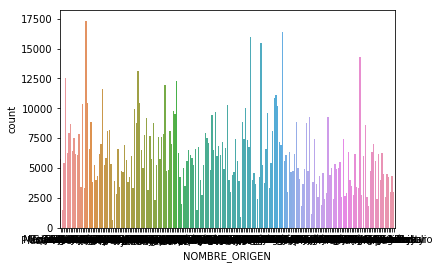

In [31]:
# cantidad de viajes desde estacion origen
sns.countplot(x = bicis.NOMBRE_ORIGEN, data = bicis)
plt.show()

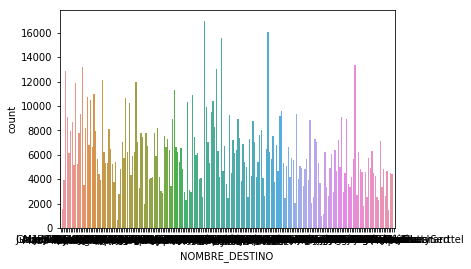

In [32]:
# cantidad de viajes recibidos en cada estacion
sns.countplot(x = bicis.NOMBRE_DESTINO, data = bicis)
plt.show()

# Creo Matriz destino_estacion vs mes utilizando pivot_table

In [35]:
destino_mes = pd.pivot_table(data = bicis, index = bicis.DESTINO_ESTACION.values, columns = bicis.mes.values, values = "cant_viajes", aggfunc = np.sum)

In [36]:
destino_mes.tail()

,1,2,3,4,5,6
199,706.0,895.0,722.0,1158.0,1312.0,1402.0
200,687.0,904.0,856.0,1532.0,2417.0,2498.0
502,60.0,49.0,58.0,71.0,130.0,124.0
505,10.0,16.0,14.0,17.0,12.0,8.0
900,NaN,NaN,4.0,NaN,NaN,NaN


In [37]:
destino_mes.isnull().any()

1     True
2     True
3    False
4     True
5     True
6     True
dtype: bool

In [38]:
destino_mes = destino_mes.fillna(0)

In [39]:
destino_mes.isnull().any()

1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

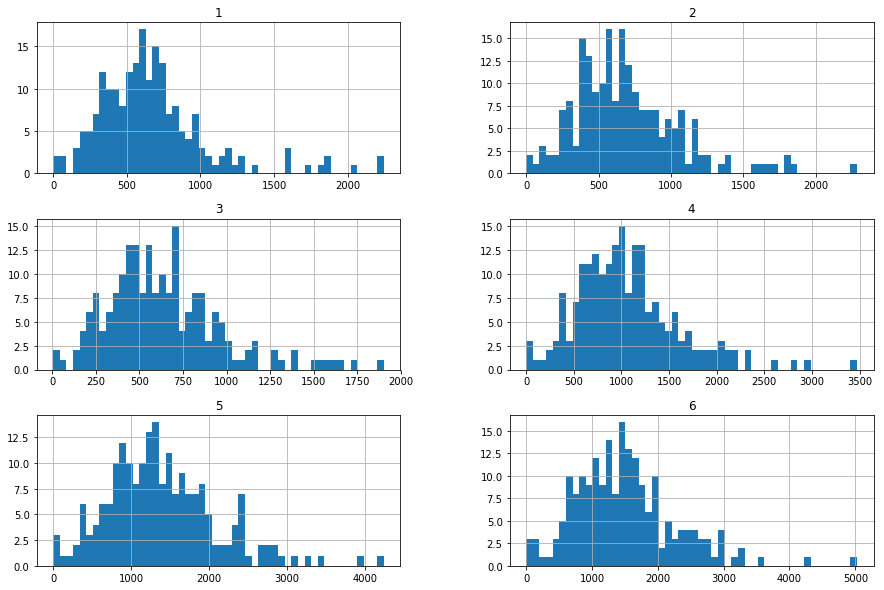

In [40]:
# histograma de destinos para cada mes
destino_mes.hist(bins=50, figsize=(15,10))
plt.show()

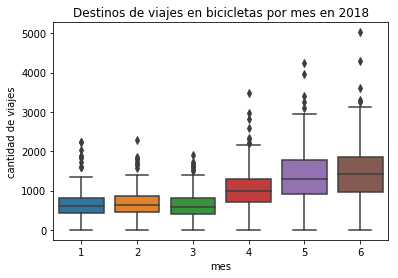

In [41]:
sns.boxplot(data = destino_mes)
plt.xlabel("mes")
plt.ylabel("cantidad de viajes")
plt.title("Destinos de viajes en bicicletas por mes en 2018")
plt.show()

# Creo matriz origen-destino (posible matriz de adyacencia)

In [42]:
origen_destino = pd.pivot_table(data = bicis, index = bicis.ORIGEN_ESTACION.values, columns = bicis.DESTINO_ESTACION.values, values = "cant_viajes", aggfunc = np.sum)

In [43]:
np.shape(origen_destino)

(200, 201)

In [44]:
origen_destino.tail()

,1,2,3,4,5,6,7,8,9,10,...,194,195,196,197,198,199,200,502,505,900
198,2.0,NaN,NaN,1.0,2.0,5.0,2.0,4.0,2.0,NaN,...,1.0,8.0,2.0,3.0,86.0,8.0,1.0,NaN,NaN,NaN
199,20.0,14.0,9.0,19.0,19.0,14.0,7.0,45.0,33.0,6.0,...,37.0,44.0,12.0,74.0,14.0,614.0,15.0,NaN,NaN,NaN
200,199.0,19.0,1.0,9.0,91.0,2.0,8.0,38.0,366.0,1.0,...,25.0,5.0,3.0,15.0,1.0,7.0,674.0,4.0,NaN,NaN
502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
origen_destino = origen_destino.fillna(0)

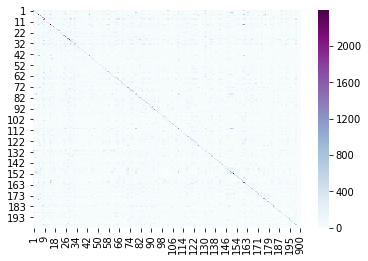

In [46]:
ax = sns.heatmap(origen_destino, cmap="BuPu")
plt.show()

In [51]:
# filtro por columnas los destinos con mas de 800 arribos
top_cols = (origen_destino.max() > 800)
top_cols.head()

1     True
2    False
3    False
4    False
5     True
dtype: bool

In [52]:
# filtro por filas los destinos con mas de 800 arribos
top_rows = (origen_destino.max(axis = 1) > 800)
top_rows.head()

1     True
2    False
3    False
4    False
5     True
dtype: bool

In [53]:
origen_destino_top = origen_destino.loc[top_rows,top_cols]

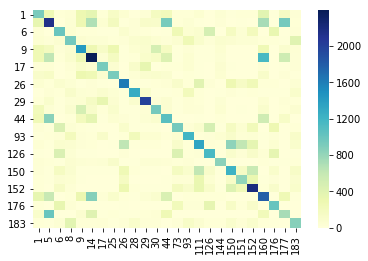

In [55]:
# matriz de adyacencia con las top estaciones
ax = sns.heatmap(origen_destino_top, cmap="YlGnBu")
plt.show()

# Importo geo-localizacion de las estaciones

In [56]:
#from mpl_toolkits.basemap import Basemap

In [57]:
estaciones = pd.read_csv('/home/human/Dropbox/clusterai/estaciones_publicas.csv', delimiter=';')

In [58]:
np.shape(estaciones)

(199, 10)

In [60]:
estaciones.head()

,X,Y,NOMBRE,DOMICILIO,IMAGEN,AUTOMAT,OBSERV,NRO_EST,HORARIO,DIRE_NORM
0,-58.392452,-34.583133,FACULTAD DE DERECHO,AV. PRES.FIGUEROA ALCORTA Y JUAN A.BIBILONI,ESTACION_AUTOMATICA.PNG,AUTOMATICA,ABRIL 2015 (PASO DE SER MANUAL A AUTOMATICA),1,ESTACION AUTOMATICA: DISPONIBILIDAD LAS 24 HORAS,"FIGUEROA ALCORTA, PRES. AV. Y BIBILONI, JUAN A."
1,-58.374822,-34.592589,RETIRO,AV. DR.JOSE RAMOS MEJIA Y DEL LIBERTADOR AV,ESTACION_AUTOMATICA.PNG,AUTOMATICA,ABRIL 2015 (PASO DE SER MANUAL A AUTOMATICA),2,ESTACION AUTOMATICA: DISPONIBILIDAD LAS 24 HORAS,"DEL LIBERTADOR AV. Y RAMOS MEJIA, JOSE MARIA, ..."
2,-58.368918,-34.611242,ADUANA,AV. ING.HUERGO Y AV. BELGRANO,ESTACION_AUTOMATICA.PNG,AUTOMATICA,ABRIL 2015 (PASO DE SER MANUAL A AUTOMATICA),3,ESTACION AUTOMATICA: DISPONIBILIDAD LAS 24 HORAS,"HUERGO, ING. AV. Y BELGRANO AV."
3,-58.368950,-34.601721,PLAZA ROMA,LAVALLE Y BOUCHARD,ESTACION_AUTOMATICA.PNG,AUTOMATICA,ABRIL 2015 (PASO DE SER MANUAL A AUTOMATICA),4,ESTACION AUTOMATICA: DISPONIBILIDAD LAS 24 HORAS,LAVALLE Y BOUCHARD
4,-58.369709,-34.628301,PARQUE LEZAMA,AV MARTIN GARCIA E IRALA,ESTACION_AUTOMATICA.PNG,AUTOMATICA,ABRIL 2015 (PASO DE SER MANUAL A AUTOMATICA),6,ESTACION AUTOMATICA: DISPONIBILIDAD LAS 24 HORAS,"GARCIA, MARTIN AV. E IRALA"


In [61]:
destino_mes.head()

,1,2,3,4,5,6
1,1350.0,1394.0,1397.0,2198.0,2808.0,2938.0
2,677.0,646.0,796.0,1204.0,1605.0,1590.0
3,833.0,877.0,823.0,1464.0,1948.0,807.0
4,893.0,707.0,627.0,1036.0,1451.0,1683.0
5,1600.0,1719.0,1728.0,2218.0,2955.0,2746.0


**Hago Merge de destino_mes y estaciones (solo sus coordenadas x y)**

In [62]:
destino_mes_location = destino_mes.merge(estaciones[["X","Y"]],left_on = destino_mes.index.values,right_on = estaciones.NRO_EST.values)

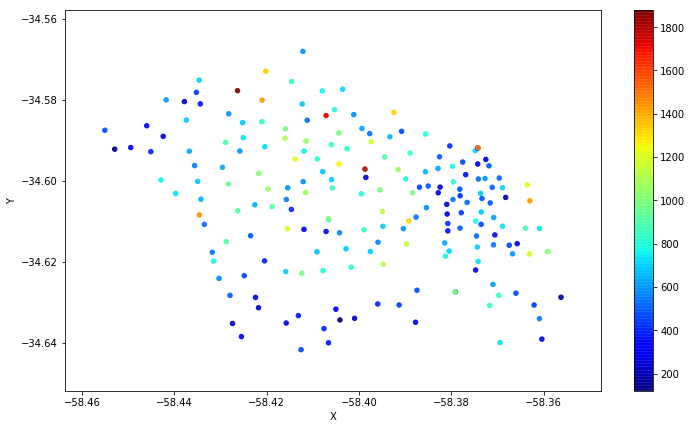

In [73]:
destino_mes_location.plot(kind="scatter",  x="X", y="Y", alpha=0.9, figsize=(12,7), c=destino_mes_location.mean(axis = 1), cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

#, s = destino_mes_location.mean(axis = 1)
plt.show()

In [74]:
#pd.merge(bicis_estaciones, estaciones[["X","Y"]], how = "left", left_on = bicis_estaciones.index, right_on = estaciones.NRO_EST)

origen_location = origen_destino_top.merge(estaciones[["X","Y"]],left_on = origen_destino_top.index.values, right_on = estaciones.NRO_EST.values)

In [75]:
origen_location.head()

,key_0,1,5,6,8,9,14,17,25,26,...,144,150,151,152,160,176,177,183,X,Y
0,1,923.0,272.0,20.0,43.0,297.0,369.0,25.0,148.0,58.0,...,51.0,18.0,28.0,23.0,386.0,18.0,163.0,34.0,-58.392452,-34.583133
1,5,354.0,2148.0,4.0,53.0,284.0,692.0,57.0,197.0,16.0,...,37.0,0.0,11.0,8.0,736.0,5.0,952.0,25.0,-58.420997,-34.580127
2,6,43.0,8.0,1000.0,57.0,26.0,24.0,15.0,12.0,86.0,...,8.0,173.0,49.0,206.0,6.0,331.0,4.0,36.0,-58.369709,-34.628301
3,8,64.0,30.0,72.0,949.0,72.0,49.0,48.0,21.0,30.0,...,89.0,69.0,50.0,47.0,20.0,28.0,16.0,406.0,-58.389253,-34.609930
4,9,272.0,203.0,34.0,74.0,1425.0,289.0,139.0,307.0,16.0,...,63.0,4.0,9.0,5.0,264.0,6.0,85.0,46.0,-58.407145,-34.583915


In [76]:
np.shape(origen_location)

(25, 28)

/home/human/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


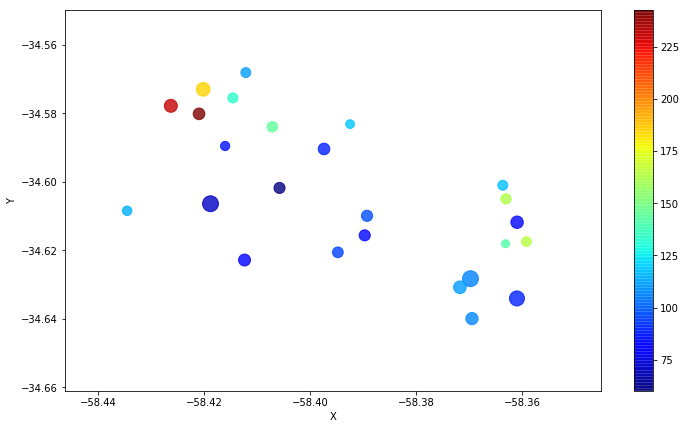

In [77]:
origen_location.plot(kind="scatter", s = origen_location.mean(),  x="X", y="Y", alpha=0.8, figsize=(12,7), c=origen_location.mean(axis = 1), cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

plt.show()